# Анализ оттока клиентов "Метанпромбанка"

Мы являемся аналитиком в "Метанпромбанке". Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

**Целью** нашего проекта будет выделение сегментов высокоотточных клиентов и составление рекомендаций для отдела маркетинга по их удержанию.

Для решения данной цели нам необходимо будет выполнить ряд **задач**:

* загрузка и изучение информации;


* предобработка данных;


* проведение исследовательского анализа (составление портретов пользователя и сегментирование отточных клиентов);


* формулировка и проверка статистических гипотиез;


* составление презентации для отдела маркетинга

### Загрузка данных, изучение общей информации

Для начала загрузим необходимые нам библиотеки и прочитаем файл с данными.

In [1]:
! pip install phik

In [2]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import phik
from phik.report import plot_correlation_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
# загружаем файл
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

except:    
    df = pd.read_csv('C:/Users/Admin/Downloads/bank_scrooge.csv"')

Загрузили файл, теперь выведем его и посмотрим на общую информацию.

In [4]:
# выводим таблицу
display(df)

# выводим общую информацию
df.info()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Наш датасет содержит 10000 строк и 12 столбцов, из общей информации и самой таблицы видим, что есть пропуски в 2-х столбцах и названия столбцов не в едином стиле, все это поправим на следующем шаге. 

**Описание данных:**

* USERID — идентификатор пользователя;

* score — баллы кредитного скоринга;

* city — город;

* gender — пол;

* age — возраст;

* equity — количество баллов собственности;

* balance — баланс на счёте;

* products — количество продуктов, которыми пользуется клиент;

* credit_card — есть ли кредитная карта;

* last_activity — активный клиент;

* EST_SALARY — оценочный доход клиента;

* сhurn — признак оттока.


#### Вывод:

Загрузили информацию о клиентах "Метанпромбанка". Данные содержат 10000 строк и 12  столбцов. 

### Предобработка данных

В первую очередь приведем названия столбцов к единому стилю.

In [5]:
# переименовываем столбцы
df = df.rename(columns={'USERID' : 'user_id', 'EST_SALARY' : 'salary'})

# выводим таблицу и проверяем
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Теперь посмотрим на пропуски в данных и решим, что можно с ними сделать.

In [6]:
# считаем количество пропусков
df.isna().sum().sort_values(ascending = False)

balance          2295
age                26
user_id             0
score               0
city                0
gender              0
equity              0
products            0
credit_card         0
last_activity       0
salary              0
churn               0
dtype: int64

Самое большое количество пропусков в столбце с балансом, почти 23% от всех данных. С этими прпоусками мы ничего сделать не можем, поэтому оставим их как есть.

В столбце возраст обнаружено 26 пропусков, что составляет около 0,3% от общего количества, данные мы заполнить не можем, удалим эти строки, так как их потеря не несет критически важной информации для проекта.

In [7]:
# удаляем строки с пропусками в столбце
df = df.dropna(subset=['age'])

# проверяем длину датасета
len(df)

9974

Далее проверим наш датасет на дубликаты.

In [8]:
# считаем количество явных дубликатов
df.duplicated().sum()

0

Явных дубликатов не обнаружено, попробуем найти неявные среди наших данных.

In [9]:
# считаем количество неявных дубликатов
df.duplicated(subset=['user_id', 'age', 'gender']).sum()

2

Выявили 2 неявных дубликата по id, возрасту и полу. Удалим их из таблицы.

In [10]:
# удаляем неявные дубликаты
df = df.drop_duplicates(subset=['user_id', 'age', 'gender']).reset_index(drop=True)

# проверяем длину датасета
len(df)

9972

Взглянем на описательную статистику нашего датафрейма.

In [11]:
# выводим описательную статистику
round(df.describe(), 1)

,user_id,score,age,equity,balance,products,credit_card,last_activity,salary,churn
count,9972.0,9972.0,9972.0,9972.0,7694.0,9972.0,9972.0,9972.0,9972.0,9972.0
mean,171751.2,848.7,42.7,2.6,827310.7,1.9,0.7,0.5,147794.0,0.2
std,33693.9,65.4,12.2,2.0,1980447.9,0.8,0.5,0.5,139298.5,0.4
min,94561.0,642.0,18.0,0.0,0.0,0.0,0.0,0.0,2546.3,0.0
25%,142750.5,802.0,33.0,0.0,295633.9,1.0,0.0,0.0,75240.7,0.0
50%,172643.0,853.0,40.0,3.0,524356.5,2.0,1.0,1.0,119626.8,0.0
75%,201163.2,900.0,51.0,4.0,980378.5,2.0,1.0,1.0,174500.5,0.0
max,229145.0,1000.0,86.0,9.0,119113552.0,5.0,1.0,1.0,1395064.4,1.0


Из описательной части мы видим, что диапозон возраста наших клиентов находится в интервале от 18 до 86 лет, что соответствует банковским нормам. Сильно выделяется разница между минимальным и максимальным балансами и доходами клиентов, но данная история имеет место быть, поэтому не будем считать это за аномалию. Единственное, что смущает, это наличие 0 продуктов, что не может быть, так как человек тогда не будет считаться клиентом банка.


In [12]:
# делаем срез
df[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
8937,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Нашелся всего 1 "клиент", у которого нет продуктов. Удалим его из наших данных.

In [13]:
# удаляем данные по срезу
df = df[df['products'] != 0]

# проверяем длину датасета
len(df)

9971

Проверим уникальные значения в столбцах с городом и полом.

In [14]:
# выводим уникальные значения в столбце
display(df['city'].unique())

# выводим уникальные значения в столбце
df['gender'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

array(['Ж', 'М'], dtype=object)

Как видим, что городов у нас 3 как заявлено в описании проекта. Полов у нас 2 типа, что тоже соответсвует норме. 

Далее можно приступать к исследовательскому анализу.

#### Вывод:

Провели предобработку данных, а именно:

* привели названия столбцов к единому стилю;


* посчитали количество пропусков: данные с пропусками в столбце возраст удалили, так как их всего 0,3% от общего количества и они не повлияют на наше исследование. Пропуски в столбце баланс (2295 или почти 23%) оставили как есть, так как их удаление критично для нашего анализа;


* нашли 2 неявных дубликата, удалили данные строки из нашей таблицы;


* выявили одного "клиента", у которого не было продуктов банка. Его данные удалили, так как он не может быть клиентом без единого продукта

### Исследовательский анализ данных

На данном этапе мы лучше изучим наших клиентов, составим профили оставшихся и ушедших клиентов, а также сегментируем высокоотточных клиентов.

Для начала проанализируем, как признаки клиентов коррелирует между собой: так как user_id не является признаком, установим его вместо индекса.

In [15]:
# меняем индекс на значения столбца user_id
df = df.set_index('user_id')

# выводим таблицу и проверяем
df.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
user_id,,,,,,,,,,,
183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [16]:
# сохраняем в переменную матрицу корреляции
phik_corr = df.phik_matrix(interval_cols=['score','balance','salary','age']).round(2)

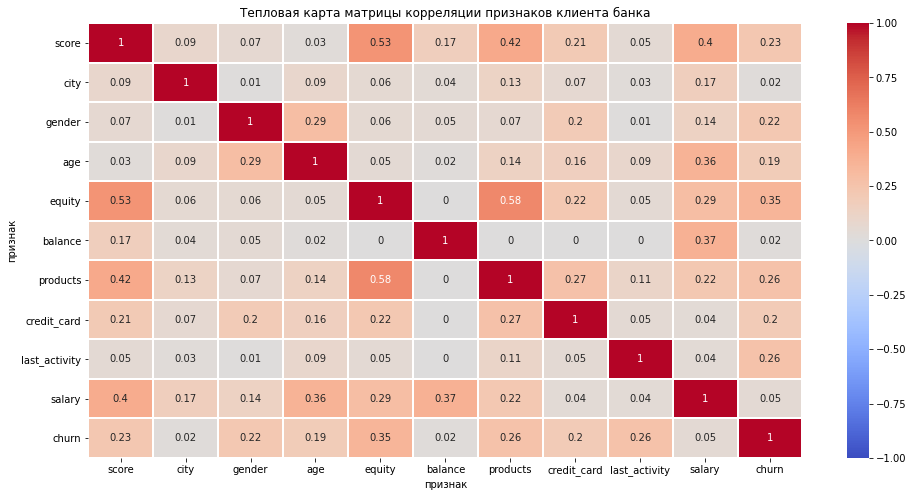

In [17]:
# строим график
plt.figure(figsize=(16,8))

sns.heatmap (
    phik_corr,
    annot=True,
    vmin=-1,
    vmax=1,
    center= 0,
    cmap= 'coolwarm',
    linewidths=1)
plt.title('Тепловая карта матрицы корреляции признаков клиента банка')
plt.ylabel('признак')
plt.xlabel('признак')
plt.show()

Для анализа зависимости будем использовать шкалу Чеддока:
    
Значения шкалы:

* 0,1–0,3 — слабая связь;
* 0,3–0,5 — умеренная связь;
* 0,5–0,7 — заметная связь;
* 0,7–0,9 — высокая связь;
* 0,9–0,99 — весьма высокая связь.    
    
Высокой зависимости между признаками не наблюдается.

Отметим, что есть заметная зависимость между products и equity (0,58), между score и equity (0,53). 
    
Умеренная связь есть между products и score (0,42), между salary  и score (0,4) между salary и balance (0,37), между salary и age (0,36).    

Отдельно построим тепловую карту зависимости признаков от оттока.

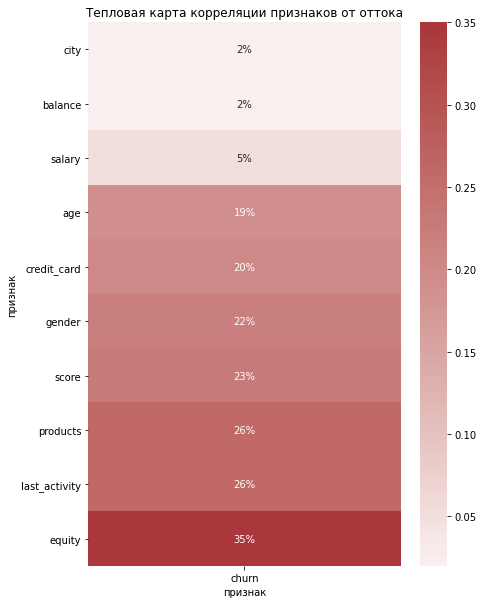

In [18]:
# строим график
plt.figure(figsize=(7,10))

sns.heatmap(
    phik_corr.loc[:,['churn']].drop('churn').sort_values('churn'),
    annot =True,
    fmt = ".0%",
    cmap = 'vlag',
    center = 0
)
plt.title('Тепловая карта корреляции признаков от оттока')
plt.ylabel('признак')
plt.xlabel('признак')
plt.yticks(rotation=0)
plt.show()

Видим, что имеется умеренная связь оттока от количества баллов собсвенности (35%), остальные признаки имеют слабую зависимость.

#### Портрет типичного пользователя

Узнаем, какое количество клиентов уже ушло и какая часть средств была потеряна с их уходом.

In [19]:
# считаем уникальные значения в столбце
df['churn'].value_counts()

0    8153
1    1818
Name: churn, dtype: int64

Визуализируем данные для наглядности.

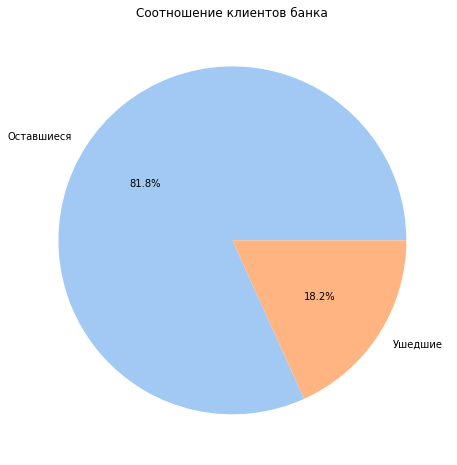

In [20]:
# строим график
labels = ['Оставшиеся', 'Ушедшие']

df['churn'].value_counts().plot(
    kind='pie',
    autopct='%0.1f%%',
    figsize = (8,8),
    colors=sns.color_palette('pastel'),
    labels= labels
)
plt.title('Соотношение клиентов банка')
plt.ylabel('')
plt.show()

Посмотрим на суммарные балансы ушедших и оставшихся клиентов.

In [21]:
# делаем сводную таблицу
data = df.groupby('churn').agg({'balance' : 'sum'}).reset_index()

# выводим ее
data

,churn,balance
0,0,4.316497e+09
1,1,2.048832e+09


Построим график по этим данным.

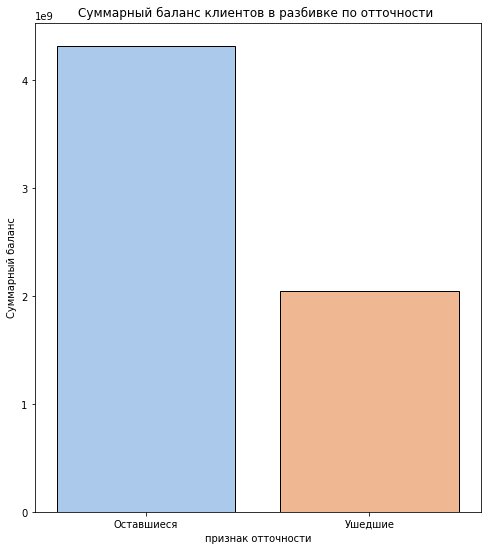

In [22]:
# строим график
plt.figure(figsize=(8,9))
labels = ['Оставшиеся', 'Ушедшие']
sns.barplot(y = data['balance'], x = labels, palette = 'pastel', ec='black')
plt.title('Суммарный баланс клиентов в разбивке по отточности ')
plt.ylabel('Суммарный баланс')
plt.xlabel('признак отточности')
plt.show()

Как мы видим из графиков, итого 18% ушедших клиентов и 2 млрд.рублей отток средств клиентов ( практически треть всех средств клиентов до ухода), что очень критично для банка.

Сгруппируем данные по признаку отточности для составления типичных портретов клиентов и посчитаем средний скоринговый бал, средний возраст, среднее количество баллов по имуществу, среднее количество продуктов банка, медианную зарплату и балансы, а также долю активных клиентов и долю, у которых есть крединая карта.

In [23]:
# делаем сводную таблицу
round(
    df.groupby('churn', as_index = False)
    .agg(
        {'score' : 'mean',
         'age' : 'mean',
         'equity' : 'mean',
         'balance' : 'median',
         'products' : 'mean',
         'credit_card' : 'mean',
         'last_activity' : 'mean',
         'salary' : 'median'
        }
    )
, 2)

,churn,score,age,equity,balance,products,credit_card,last_activity,salary
0,0,845.39,43.02,2.38,475437.82,1.76,0.71,0.48,118227.60
1,1,863.36,41.43,3.76,783908.90,2.38,0.55,0.70,125408.88


В данных нет деления по полу, так как это нечисловой тип данных. Отдельно построим графики разделения оставшихся/ушедших клиентов по полу.

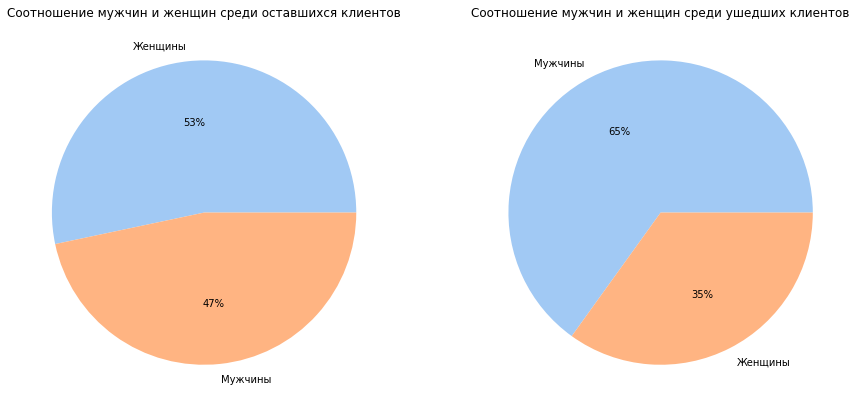

In [24]:
# строим графики
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1, 2, 1)

labels = ['Женщины','Мужчины']
plt.pie(
    df.query('churn == 0')['gender'].value_counts(),
    autopct='%.0f%%',
    colors=sns.color_palette('pastel'),
    labels= labels
)
plt.title('Соотношение мужчин и женщин среди оставшихся клиентов')

ax2 = plt.subplot(1, 2, 2)

labels = ['Мужчины', 'Женщины']
plt.pie(
    df.query('churn == 1')['gender'].value_counts(),
    autopct='%.0f%%',
    colors=sns.color_palette('pastel'),
    labels= labels
)
plt.title('Соотношение мужчин и женщин среди ушедших клиентов')
plt.show()

Из описательной части и графиков можно сделать выводы о типичном портрете клиента в разрезе оставшиеся/ушедшие:

* оставшийся клиент - это зачастую неактивный клиент женского пола в возрасте 43 лет (в среднем) с 2-мя продуктами от банка, есть кредитная карта, медианный доход 118 тыс. рублей и имеет на балансе 475 тысяч рублей (медианное значение), средний скоринговый бал 845, среднее значение балов собственности 2,3;


* ушедший клиент - это активный клиент мужского пола в возрасте 41 года (в среднем) с 2-мя продуктами от банка, есть кредитная карта, медианный доход 125 тысяч рублей и имеет на балансе 783 тысячи рублей (медианное значение), средний скоринговый бал 863, среднее значение балов собственности 3,76.

Узнаем из какого города больше всего отточных клиентов.

In [25]:
# делаем сводную таблицу
city_grouped = df.groupby('city', as_index = False).agg({'churn': ['count', 'sum', 'mean']})

city_grouped.columns = ['city', 'cnt_client', 'cnt_churn', 'share_churn']

city_grouped['share_churn'] = round(city_grouped['share_churn'] * 100, 2)

city_grouped.sort_values(by='share_churn', ascending=False)

,city,cnt_client,cnt_churn,share_churn
2,Ярославль,5874,1117,19.02
0,Ростов,1416,265,18.71
1,Рыбинск,2681,436,16.26


Визуализируем данные.

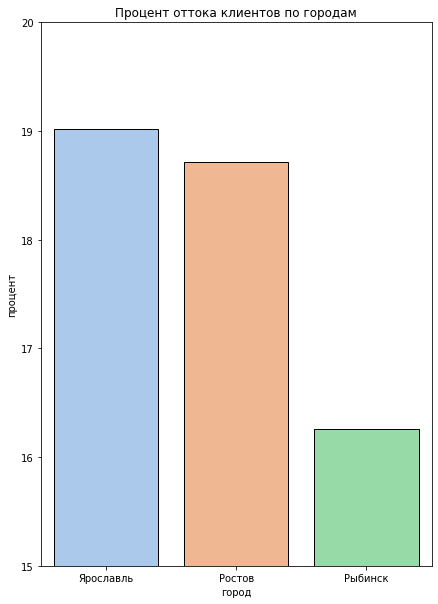

In [26]:
# строим график
plt.figure(figsize=(7,10))
sns.barplot(
    data = city_grouped.sort_values(by='share_churn', ascending=False),
    y = 'share_churn',
    x = 'city',
    palette = 'pastel',
    ec='black'
)
plt.title('Процент оттока клиентов по городам')
plt.ylabel('процент')
plt.xlabel('город')
plt.ylim(15,20)
plt.show()

Из графика видно, что больше всего отточных клиентов из Ярославля (1117 клиентов или 19,02%), далее идут Ростов (18,71% или 265 человек) и Рыбинск (436 клиентов или 16,26%).

#### Поиск интервалов для выделения сегментов

Далее мы рассмотрим каждый признак клиента в отдельности и найдем интервалы значений, где наибольшая плотность отточных клиентов, что в дальнейшем поможет нам создать сегменты ушедших клиентов. 

Начнем со скорингового балла клиентов.

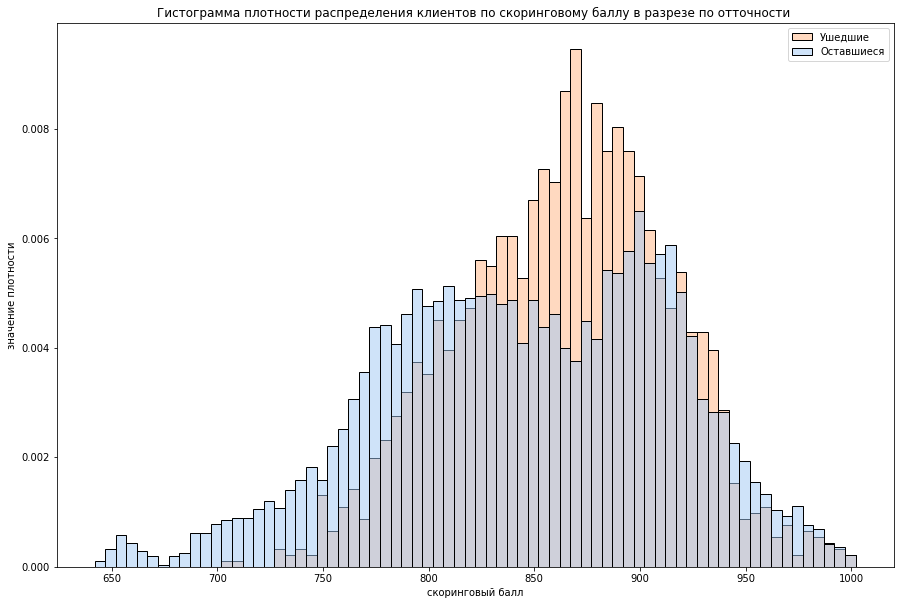

In [27]:
# строим график
plt.figure(figsize = (15,10))

sns.histplot(data=df, hue='churn', x='score', stat='density', common_norm = False, palette = 'pastel', binwidth=5 )
plt.title('Гистограмма плотности распределения клиентов по скоринговому баллу в разрезе по отточности ')
plt.ylabel('значение плотности')
plt.xlabel('скоринговый балл')
plt.legend(['Ушедшие','Оставшиеся'])
plt.show()

In [28]:
# проверяем длину среза
len(df.query('(825 <= score <= 905) | (920<= score <= 940)'))

4967

In [29]:
# ищем процент по условию
round(
    len(df.query('((825 <= score <= 905) | (920<= score <= 940)) & (churn ==1)'))/
    len(df.query('(825 <= score <= 905) | (920<= score <= 940)')) * 100, 
    2
)

23.96

Далее рассмотрим возраст клиентов.

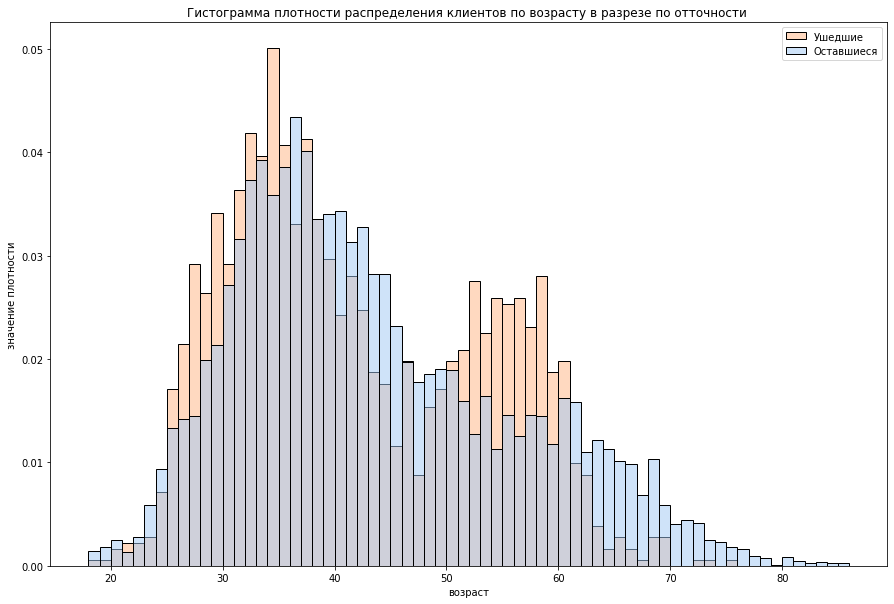

In [30]:
# строим график
plt.figure(figsize = (15,10))

sns.histplot(data=df, hue='churn', x='age', stat='density', common_norm = False, palette = 'pastel', binwidth=1)
plt.title('Гистограмма плотности распределения клиентов по возрасту в разрезе по отточности ')
plt.ylabel('значение плотности')
plt.xlabel('возраст')
plt.legend(['Ушедшие','Оставшиеся'])
plt.show()

In [31]:
# проверяем длину среза
len(df.query('(50 <= age <= 60) | (25<=age<=35) '))

4821

In [32]:
# ищем процент по условию
round(
    len(df.query('((50 <= age <= 60) | (25<=age<=35)) & (churn ==1)'))/
    len(df.query('(50 <= age <= 60) | (25<=age<=35) ')) * 100,
    2
)

23.5

Следующий признак, который мы рассмотрим, это баллы собственности.

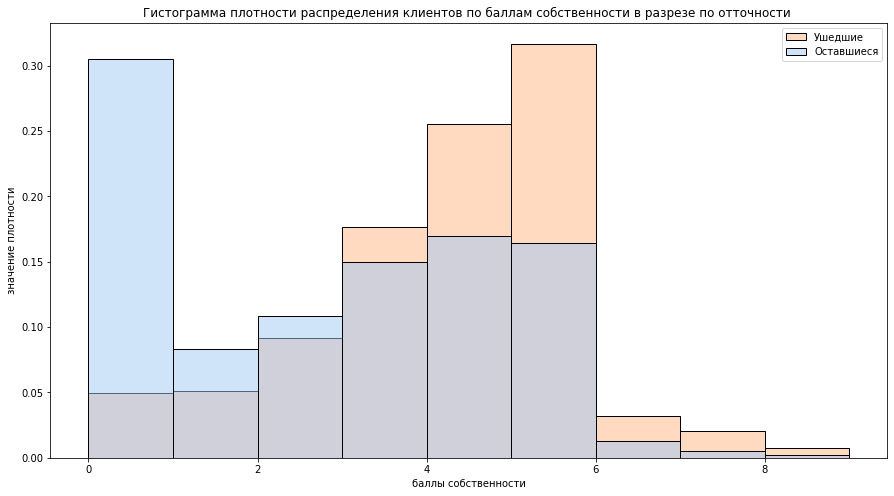

In [33]:
# строим график
plt.figure(figsize = (15,8))

sns.histplot(data=df, hue='churn', x='equity', stat='density', common_norm = False, palette = 'pastel', binwidth=1)
plt.title('Гистограмма плотности распределения клиентов по баллам собственности в разрезе по отточности ')
plt.ylabel('значение плотности')
plt.xlabel('баллы собственности')
plt.legend(['Ушедшие','Оставшиеся'])
plt.show()

In [34]:
# проверяем длину среза
len(df.query('equity >=4'))

4033

In [35]:
# ищем процент по условию
round(
    len(df.query('(equity >=4) & (churn ==1)'))/
    len(df.query('equity >=4')) * 100,
    2
)

28.47

Далее рассмотрим такой признак как баланс.

В данных имеются одиночные огромные значения, поэтому мы рассмотрим балансы, которые меньше 4 млн. рублей. Посчитаем процент потерь, который мы не используем при построении графика.

In [36]:
# ищем процент по условию
round(len(df.query('balance > 4000000'))/ len(df['balance']) *100, 2)

1.11

Процент оказался незначительным, поэтому выбранный срез идеально подойдет для графика.

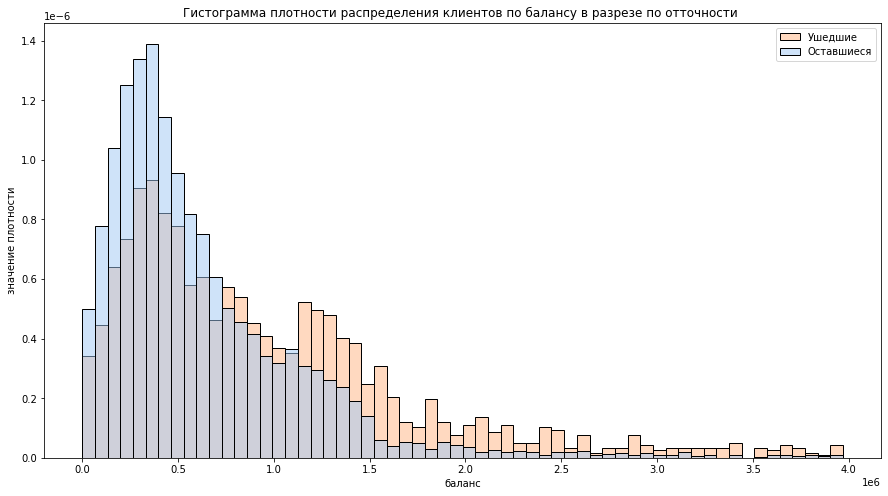

In [37]:
# строим график
plt.figure(figsize = (15,8))

sns.histplot(
    data=df.query('balance < 4000000'),
    hue='churn',
    x='balance',
    stat='density',
    common_norm = False,
    palette = 'pastel'
)
plt.title('Гистограмма плотности распределения клиентов по балансу в разрезе по отточности ')
plt.ylabel('значение плотности')
plt.xlabel('баланс')
plt.legend(['Ушедшие','Оставшиеся'])
plt.show()

Из графика видно, что больше плотность отточных клиентов в интервале от 750000 до 1000000 млн.рублей и от 1150000 до 4000000 млн. рублей.

Найдем количество клиентов, попадающих в эти диапозоны, и процент ушедших.

In [38]:
# проверяем длину среза
len(df.query('(750000 <= balance <= 1000000)| (1150000 <= balance <= 4000000)'))

2188

In [39]:
# ищем процент по условию
round(
    len(df.query('((750000 <= balance <= 1000000)| (1150000 <= balance <= 4000000)) & (churn ==1)'))/
    len(df.query('(750000 <= balance <= 1000000)| (1150000 <= balance <= 4000000)')) * 100,
    2
)

36.29

Следующий признак - количество продуктов.

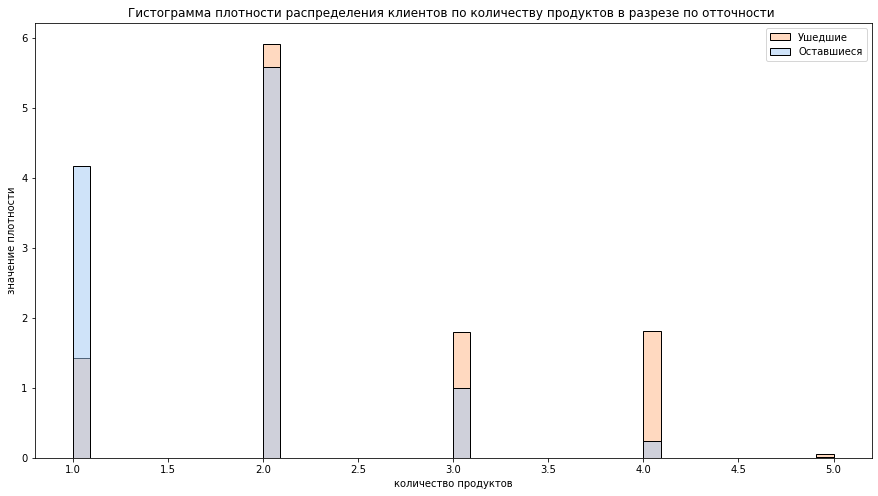

In [40]:
# строим график
plt.figure(figsize = (15,8))

sns.histplot(data=df, hue='churn', x='products', stat='density', common_norm = False, palette = 'pastel')
plt.title('Гистограмма плотности распределения клиентов по количеству продуктов в разрезе по отточности ')
plt.ylabel('значение плотности')
plt.xlabel('количество продуктов')
plt.legend(['Ушедшие','Оставшиеся'])
plt.show()

Больше всего отточных клиентов с 2-мя и более продуктами банка.

Найдем количество таких клиентов и процент ушедших.

In [41]:
# проверяем длину среза
len(df.query('products >= 2'))

6649

In [42]:
# ищем процент по условию
round(
    len(df.query('(products >= 2) & (churn ==1)'))/
    len(df.query('products >= 2')) * 100,
    2
)

23.81

Заключительным признаком по определению интервалов отточности клиентов будет их доход.

В данных по доходу тоже присутствуют одиночные большие значения, мы их не будем учитывать при построении графика, чтоб он был читабельным. 

Посчитаем какой процент данных мы срезаем, чтобы быть уверенными, что он не критичен для нас.

In [43]:
# ищем процент по условию
round(len(df.query('salary > 400000'))/len(df['salary']) * 100, 2)

3.36

Процент не катострофичен, поэтому строим график с учетом этого среза.

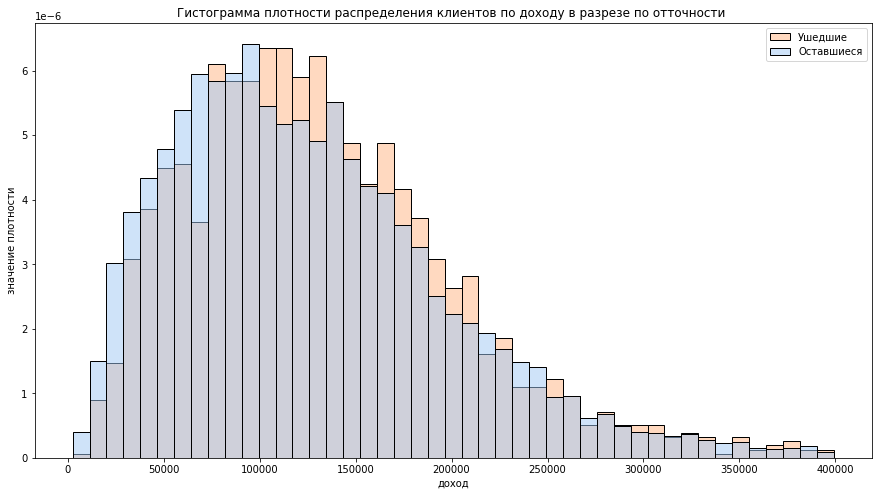

In [44]:
# строим график
plt.figure(figsize = (15,8))

sns.histplot(
    data=df.query('salary < 400000'),
    hue='churn',
    x='salary',
    stat='density',
    common_norm = False,
    palette = 'pastel'    
)
plt.title('Гистограмма плотности распределения клиентов по доходу в разрезе по отточности ')
plt.ylabel('значение плотности')
plt.xlabel('доход')
plt.legend(['Ушедшие','Оставшиеся'])
plt.show()

По графику видно, что наибольшее количество отточных клиентов находится в интервалах от 100000 до 135000 рублей и от 145000 до 215000 рублей.

Посмотрим, какое количество клиентов попадает в эти интервалы и процент ушедших.

In [45]:
# проверяем длину среза
len(df.query('(100000 <= salary <= 135000) | (145000 <= salary <= 215000)'))

4089

In [46]:
# ищем процент по условию
round(
    len(df.query('((100000 <= salary <= 135000) | (145000 <= salary <= 215000)) & (churn ==1)'))/
    len(df.query('(100000 <= salary <= 135000) | (145000 <= salary <= 215000)')) * 100,
    2
)

20.89

В итоге мы получили  признаки с интервалами значений отточности клиентов. Сами по себе эти диапозоны массивны, поэтому мы будем их объединять между собой, чтобы выделить высокоотточные сегменты  клиентов (от 500 до 2000 клиентов в сегменте).

#### Выделение сегментов высокоотточных клиентов

Составим первый портрет: активный клиент с 2-мя и более продуктами, имеющий на балансе от 750 тыс. до 1 млн. рублей или от 1,150 до 4 млн. рублей) - и посмотрим на количество таких клиентов и процент оттока.

In [47]:
# делаем срез по условиям
segment_one = df.query(
    '(products >= 2) & ((750000 <= balance <= 1000000)| (1150000 <= balance <= 4000000)) & (last_activity == 1)'
)

# считаем агрегации по оттоку
round(segment_one.agg({'churn' : ['count', 'sum', 'mean']}), 3)

,churn
count,1018.000
sum,538.000
mean,0.528


Количество клиентов находится в заданном нами диапозоне от 500 до 2000 человек и сотсавляет 1018 людей. Процент оттока в данном случае составляет 52,8%, что почти в 3 раза превышает общий отток клиентов из банка.

Составим второй портрет: активный клиент без кредитной карты с зарплатой от 100 до 135 тысяч рублей или от 145 до 215 тысяч рублей - и посмотрим на количество таких клиентов и процент оттока.

In [48]:
# делаем срез по условиям
segment_two = df.query(
    '((100000 <= salary <= 135000) | (145000 <= salary <= 215000))\
    & (credit_card == 0) & (last_activity == 1)'
)

# считаем агрегации по оттоку
round(segment_two.agg({'churn' : ['count', 'sum', 'mean']}), 3)

,churn
count,718.000
sum,303.000
mean,0.422


Количество таких клиентов составляет 718 человек, процент оттока  - 42,2%.

Составим 3 портрет: клиент, имеющий показатель количества баллов собственности больше или равно 4, со скоринговым баллом в диапозоне от 825 до 905 или от 920 до 940 и с зарплатой от от 100 до 135 тысяч рублей или от 145 до 215 тысяч рублей.

In [49]:
# делаем срез по условиям
segment_three = df.query(
    '(equity >=4) & ((825 <= score <= 905) | (920<= score <= 940))\
    & ((100000 <= salary <= 135000) | (145000 <= salary <= 215000))'
)

# считаем агрегации по оттоку
round(segment_three.agg({'churn' : ['count', 'sum', 'mean']}), 3)

,churn
count,1036.000
sum,401.000
mean,0.387


Количество клиентов по 3 портрету составляет 1036 человек. Процент оттока - 38,7%.

Составим 4 портрет: активный клиент в возрасте от 25 до 35 лет или от 50 до 60 лет с 2-мя и более продуктами.

In [50]:
# делаем срез по условиям
segment_four = df.query(
    '(products >= 2) & ((50 <= age <= 60) | (25<=age<=35)) & (last_activity == 1) '
)

# считаем агрегации по оттоку
round(segment_four.agg({'churn' : ['count', 'sum', 'mean']}), 3)

,churn
count,1745.000
sum,731.000
mean,0.419


Количество клиентов по такому портрету составляет 1745 человек. Процент оттока 41,9%.

Составим пяты портрет: активный клиент со скоринговым баллом в диапозоне от 825 до 905 или от 920 до 940 и с зарплатой от от 100 до 135 тысяч рублей или от 145 до 215 тысяч рублей.

In [51]:
# делаем срез по условиям
segment_five = df.query(
    '((825 <= score <= 905) | (920 <= score <= 940))\
    & ((100000 <= salary <= 135000) | (145000 <= salary <= 215000))\
    & (last_activity == 1)'
)

# считаем агрегации по оттоку
round(segment_five.agg({'churn' : ['count', 'sum', 'mean']}), 3)

,churn
count,1098.000
sum,456.000
mean,0.415


Получили 1098 клиентов по данному условию. Процент оттока 41,5%.

Наибольший отток клиентов у нас наблюдается в первом портрете (52,8%), далее идет второй портрет с показателем оттока в 42,2%, на 3 месте расположился четвертый портрет клиента - доля отточных клиентов 41,9%.

Дадим рекомендации для отдела маркетинга по этим 3-м сегментам.

**Первый сегмент** (количество клиентов - 1018, процент оттока 52,8%):

Портрет пользователя:

* активный клиент;

* имеет 2 и более продукта банка;

* на балансе от 750 тыс. до 1 млн. рублей или от 1,150 до 4 млн. рублей.

Рекомендации:

* улучшить условия по вкладам и накопительным счетам;

* убрать обслуживание имеющихся у клиента карт;

* предложить выгодные условия по страхованию имущества клиента, если оно есть.

**Второй сегмент** (количество клиентов - 718, процент оттока 42,2%):

Портрет пользователя:

* активный клиент;

* нет кредитной карты;

* зарплата от 100 до 135 тысяч рублей или от 145 до 215 тысяч рублей;


Рекомендации:

* предложить клиенту кредитную карту с выгодным лимитом, без обслуживания, со льготным периодом погашения;

* сделать программу кэшбэка или бонусов;


**Третий сегмент** (количество клиентов - 1745, процент оттока 41,9%):

Портрет пользователя:

* активный клиент;

* возраст от 25 до 35 лет или от 50 до 60 лет;

* имеет 2 и более продуктов банка.

Рекомендации:

* улучшить приложение банка, сделать его более интуитивно понятным для людей среднего возраста;

* предложить стать зарплатным клиентом на выгодных условиях;

* работать над своими продуктами, сообщать о внедрении новых.

#### Вывод:

На этапе исследовательского анализа провели корреляцию признаков клиента между собой, по шкале Чеддока:

Высокой зависимости между признаками не наблюдается.

Отметим, что есть заметная зависимость между products и equity (0,58), между score и equity (0,53). 
    
Умеренная связь есть между products и score (0,42), между salary  и score (0,4) между salary и balance (0,37), между salary и age (0,36).    

По корреляции признаков от оттока, имеется умеренная связь от количества баллов собсвенности (35%), остальные признаки имеют слабую зависимость.

Далее посмотрели на отток клиентов: итого 18% ушедших  и 2 млрд.рублей отток средств этих клиентов ( практически треть всех средств клиентов до ухода), что очень критично для банка.

**После этого составили типичные портреты клиентов в разрезе оттока:**

* оставшийся клиент - это зачастую неактивный клиент женского пола в возрасте 43 лет (в среднем) с 2-мя продуктами от банка, есть кредитная карта, медианный доход 118 тыс. рублей и имеет на балансе 475 тысяч рублей (медианное значение), средний скоринговый бал 845, среднее значение балов собственности 2,3;


* ушедший клиент - это активный клиент мужского пола в возрасте 41 года (в среднем) с 2-мя продуктами от банка, есть кредитная карта, медианный доход 125 тысяч рублей и имеет на балансе 783 тысячи рублей (медианное значение), средний скоринговый бал 863, среднее значение балов собственности 3,76.

Также проанализировали, что больше всего отточных клиентов из Ярославля (1117 клиентов или 19,02%), далее идут Ростов (18,71% или 265 человек) и Рыбинск (436 клиентов или 16,26%).

**Далее приступили к поискам интервалов высокотточных клиентов:**

* отточных клиентов по скоринговому баллу больше в интервале от 825 до 905 баллов и от 920 до 940 баллов. Количество клиентов всего - 4967, процент оттока - 23,96%;


* наибольшее количество высокотточных клиентов по возрасту находится в интервале от 25 до 35 лет и от 50 до 60 лет. Количество клиентов всего - 4821, процент оттока - 23,5%;


* отточных клиентов больше со значением балла собсвенности больше 3-х. Количество клиентов всего - 4033, процент оттока - 28,47%;


* больше плотность отточных клиентов с балансом в интервале от 750000 до 1000000 млн.рублей и от 1150000 до 4000000 млн. рублей. Количество клиентов всего - 2188, процент оттока - 36,29%;


* больше всего отточных клиентов с 2-мя и более продуктами банка. Количество клиентов всего - 6649, процент оттока - 23,81%;


* наибольшее количество отточных клиентов имеет зарплату в интервалах от 100000 до 135000 рублей и от 145000 до 215000 рублей. Количество клиентов всего - 4089, процент оттока - 20,89%.


Объединяя признаки между собой, удалось выделить 3 высокотточных сегмента и дать по ним рекомендации для отдела маркетинга.

**Первый сегмент** (количество клиентов - 1018, процент оттока 52,8%):

Портрет пользователя:

* активный клиент:

* имеет 2 и более продукта банка;

* на балансе от 750 тыс. до 1 млн. рублей или от 1,150 до 4 млн. рублей.

**Рекомендации:**

* улучшить условия по вкладам и накопительным счетам;

* убрать обслуживание имеющихся у клиента карт;

* предложить выгодные условия по страхованию имущества клиента, если оно есть.

**Второй сегмент** (количество клиентов - 718, процент оттока 42,2%):

Портрет пользователя:

* активный клиент;

* нет кредитной карты;

* зарплата от 100 до 135 тысяч рублей или от 145 до 215 тысяч рублей;

**Рекомендации:**

* предложить клиенту кредитную карту с выгодным лимитом, без обслуживания, со льготным периодом погашения;

* сделать программу кэшбэка или бонусов;

**Третий сегмент** (количество клиентов - 1745, процент оттока 41,9%):

Портрет пользователя:

* активный клиент;

* возраст от 25 до 35 лет или от 50 до 60 лет;

* имеет 2 и более продуктов банка.

**Рекомендации:**

* улучшить приложение банка, сделать его более интуитивнопонятным для людей среднего возраста;

* предложить стать зарплатным клиентом на выгодных условиях;

* работать над своими продуктами, сообщать о внедрении новых.

### Формулировка и проверка гипотез

На данном шаге выдвинем и проверим несколько гипотез.

**Гипотеза №1**. Различие доходов оставшихся и отточных клиентов.

Сформулируем нулевую и альтернативную гипотезы:

* H0: доходы оставшихся и отточных клиентов равны;


* H1: доходы оставшихся и отточных клиентов не равны.

Для проверки гипотезы проведем t-test:

In [52]:
# делаем тест, проверяем гипотезу
alpha = 0.05

results = st.ttest_ind(df[df['churn']==0]['salary'], 
                       df[df['churn']==1]['salary'],
                       equal_var=False)

print('p-значение: ', results.pvalue)  

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")

else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.8375793339223048
Не получилось отвергнуть нулевую гипотезу


Cчитаем, что доходы оставшихся и отточных клиентов не имеют разницы.

**Гипотеза №2**. Различие скорингового балл оставшихся и отточных клиентов.

Сформулируем нулевую и альтернативную гипотезы:

* H0: скоринговый балл оставшихся и отточных клиентов равны;


* H1: скоринговый балл оставшихся и отточных клиентов не равны.

Для проверки гипотезы проведем t-test:

In [53]:
# делаем тест, проверяем гипотезу
alpha = 0.05

results = st.ttest_ind(df[df['churn']==0]['score'], 
                       df[df['churn']==1]['score'],
                       equal_var=False)

print('p-значение: ', results.pvalue)  

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")

else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2276759181238623e-37
Отвергаем нулевую гипотезу


Следовательно различия в баллах кредитного скоринга между ушедшими и оставшимеся клиентами есть.

#### Вывод:

Выдвинули и проверили несколько гипотез:

**Гипотеза №1.** Различие доходов оставшихся и отточных клиентов. 

* H0: доходы оставшихся и отточных клиентов равны;


* H1: доходы оставшихся и отточных клиентов не равны.


Не получилось отвергнуть нулевую гипотезу. Cчитаем, что доходы оставшихся и отточных клиентов не имеют разницы.



**Гипотеза №2.** Различие скорингового балл оставшихся и отточных клиентов.

* H0: скоринговый балл оставшихся и отточных клиентов равны;


* H1: скоринговый балл оставшихся и отточных клиентов не равны.


Отвергаем нулевую гипотезу. Следовательно различия в баллах кредитного скоринга между ушедшими и оставшимеся клиентами есть.

### Презентация

Ссылка на презентацию: https://disk.yandex.ru/d/2VWpf2trWiDUEQ

### Общий вывод:

К нам обратился отдел маркетинга "Метанпромбанка" за помощью с целью выявления высокоотточных сегментов клиентов банка.

**На первоначальном этапе** мы загрузили информацию о клиентах "Метанпромбанка". Данные содержат 10000 строк и 12 столбцов.

**Далее провели предобработку данных, а именно:**

* привели названия столбцов к единому стилю;


* посчитали количество пропусков: данные с пропусками в столбце возраст удалили, так как их всего 0,3% от общего количества и они не повлияют на наше исследование. Пропуски в столбце баланс (2295 или почти 23%) оставили как есть, так как их удаление критично для нашего анализа;


* нашли 2 неявных дубликата, удалили данные строки из нашей таблицы;


* выявили одного "клиента", у которого не было продуктов банка. Его данные удалили, так как он не может быть клиентом без единого продукта

**Потом приступили к исследовательскому анализу данных.** 

На данном этапе провели корреляцию признаков клиента между собой: наибольшая корреляция проявляется между количеством продуктов банка и количеством баллов собственности (0,43), также есть небольшая зависимость между зарплатой и балансом (0,34), оттоком и количеством продуктов (0,3).

По корреляции признаков от оттока имеется слабая зависимость (по шкале Чеддока) от количества продуктов (0,3), количества баллов собственности (0,27), активности (0,17) и скорингового балла (11).

Далее посмотрели на отток клиентов: итого 18% ушедших  и 2 млрд.рублей отток средств этих клиентов ( практически треть всех средств клиентов до ухода), что очень критично для банка.

**После этого составили типичные портреты клиентов в разрезе оттока:**

* оставшийся клиент - это зачастую неактивный клиент женского пола в возрасте 43 лет (в среднем) с 2-мя продуктами от банка, есть кредитная карта, медианный доход 118 тыс. рублей и имеет на балансе 475 тысяч рублей (медианное значение), средний скоринговый бал 845, среднее значение балов собственности 2,3;


* ушедший клиент - это активный клиент мужского пола в возрасте 41 года (в среднем) с 2-мя продуктами от банка, есть кредитная карта, медианный доход 125 тысяч рублей и имеет на балансе 783 тысячи рублей (медианное значение), средний скоринговый бал 863, среднее значение балов собственности 3,76.

Также проанализировали, что больше всего отточных клиентов из Ярославля (1117 клиентов или 19,02%), далее идут Ростов (18,71% или 265 человек) и Рыбинск (436 клиентов или 16,26%).

**Далее приступили к поискам интервалов высокотточных клиентов:**

* отточных клиентов по скоринговому баллу больше в интервале от 825 до 905 баллов и от 920 до 940 баллов. Количество клиентов всего - 4967, процент оттока - 23,96%;


* наибольшее количество высокотточных клиентов по возрасту находится в интервале от 25 до 35 лет и от 50 до 60 лет. Количество клиентов всего - 4821, процент оттока - 23,5;


* отточных клиентов больше со значением балла собсвенности больше 3-х. Количество клиентов всего - 4033, процент оттока - 28,47;


* больше плотность отточных клиентов с балансом в интервале от 750000 до 1000000 млн.рублей и от 1150000 до 4000000 млн. рублей. Количество клиентов всего - 2188, процент оттока - 36,29;


* больше всего отточных клиентов с 2-мя и более продуктами банка. Количество клиентов всего - 6649, процент оттока - 23,81%;


* наибольшее количество отточных клиентов имеет зарплату в интервалах от 100000 до 135000 рублей и от 145000 до 215000 рублей. Количество клиентов всего - 4089, процент оттока - 20,89%.


Объединяя признаки между собой, удалось выделить 3 высокотточных сегмента и дать по ним рекомендации для отдела маркетинга.

**Первый сегмент** (количество клиентов - 1018, процент оттока 52,8%):

Портрет пользователя:

* активный клиент:

* имеет 2 и более продукта банка;

* на балансе от 750 тыс. до 1 млн. рублей или от 1,150 до 4 млн. рублей.

**Рекомендации:**

* улучшить условия по вкладам и накопительным счетам;

* убрать обслуживание имеющихся у клиента карт;

* предложить выгодные условия по страхованию имущества клиента, если оно есть.

**Второй сегмент** (количество клиентов - 718, процент оттока 42,2%):

Портрет пользователя:

* активный клиент;

* нет кредитной карты;

* зарплата от 100 до 135 тысяч рублей или от 145 до 215 тысяч рублей;

**Рекомендации:**

* предложить клиенту кредитную карту с выгодным лимитом, без обслуживания, со льготным периодом погашения;

* сделать программу кэшбэка или бонусов;

**Третий сегмент** (количество клиентов - 1745, процент оттока 41,9%):

Портрет пользователя:

* активный клиент;

* возраст от 25 до 35 лет или от 50 до 60 лет;

* имеет 2 и более продуктов банка.

**Рекомендации:**

* улучшить приложение банка, сделать его более интуитивнопонятным для людей среднего возраста;

* предложить стать зарплатным клиентом на выгодных условиях;

* работать над своими продуктами, сообщать о внедрении новых.



**На заключительном шаге выдвинули и проверили несколько гипотез:**

**Гипотеза №1.** Различие доходов оставшихся и отточных клиентов. 

* H0: доходы оставшихся и отточных клиентов равны;


* H1: доходы оставшихся и отточных клиентов не равны.


Не получилось отвергнуть нулевую гипотезу. Cчитаем, что доходы оставшихся и отточных клиентов не имеют разницы.



**Гипотеза №2.** Различие скорингового балл оставшихся и отточных клиентов.

* H0: скоринговый балл оставшихся и отточных клиентов равны;


* H1: скоринговый балл оставшихся и отточных клиентов не равны.


Отвергаем нулевую гипотезу. Следовательно различия в баллах кредитного скоринга между ушедшими и оставшимеся клиентами есть.


**Для отдела маркетинга сделали призентацию по нашему анализу.**

Ссылка на презентацию: https://disk.yandex.ru/d/2VWpf2trWiDUEQ